In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.datasets import load_boston, make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()
x = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

c:\Users\82104\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
len(y)

506

In [5]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [6]:
x_scaled

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                                   random_state=42)

In [8]:
print(len(x_train))
print(len(y_train))

379
379


In [9]:
print(len(x_test))
print(len(y_test))

127
127


### 선형

In [10]:
svr = SVR(kernel='linear', C=1, gamma='auto')
svr.fit(x_train, y_train)

SVR(C=1, gamma='auto', kernel='linear')

In [11]:
pred = svr.predict(x_test)

In [12]:
print('가중치 : ', svr.coef_) #선형일 때만 뽑을수 있음
print('절편 : ', svr.intercept_)

가중치 :  [[ -3.0007846    2.46        -1.10173199   2.08294655  -2.38913005
   12.58626351  -1.65420814  -5.23800828   0.36293213  -2.96768549
   -6.30509895   3.87126886 -11.45561388]]
절편 :  [22.99158625]


In [13]:
print('평균 잔차 제곱 : ', np.mean(np.square(y_test - pred)))

평균 잔차 제곱 :  26.074456358200273


In [14]:
mse = mean_squared_error(y_test, pred)
print('평균 잔차 제곱 : ' , mse)

평균 잔차 제곱 :  26.074456358200273


In [15]:
rmse = mean_squared_error(y_test, pred)**0.5
print('rmse : ',rmse)

rmse :  5.106315340654186


In [16]:
rmse = mean_squared_error(y_test, pred, squared=False)
print('rmse : ', rmse)

rmse :  5.106315340654186


In [17]:
svr.score(x_test, y_test) #r2값

0.6276521503300827

### 다항식

In [18]:
svr = SVR(kernel='poly', C=1, gamma='auto')
svr.fit(x_train, y_train)

SVR(C=1, gamma='auto', kernel='poly')

In [19]:
pred = svr.predict(x_test)

In [20]:
print('mse : ', mean_squared_error(y_test, pred))
print('rmse : ', mean_squared_error(y_test, pred)**0.5)

mse :  59.49161474011643
rmse :  7.71308075545151


### 가우시간

In [21]:
#모델정의
scv = SVR(kernel='rbf',C=1, gamma='auto')
#모델학습
scv.fit(x_train, y_train)
#예측값 저장
pred = scv.predict(x_test)
#mse
print('mse : ', mean_squared_error(y_test, pred))
#rmse
print('rmse : ', mean_squared_error(y_test, pred)**0.5)

mse :  40.336929726181786
rmse :  6.35113609728069


In [22]:
scv.score(x_test, y_test)

0.42398150743776297

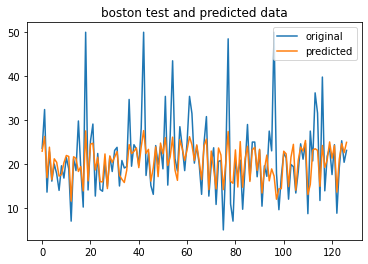

In [23]:
x_ax = range(len(y_test))

plt.plot(x_ax, y_test, label='original')
plt.plot(x_ax, pred, label='predicted')
plt.title('boston test and predicted data')
plt.legend()
plt.show()

In [24]:
kernel_list = ['linear','poly','rbf']

for kernel in kernel_list :
    scv = SVR(kernel=kernel, C=10,gamma='auto')
    scv.fit(x_train, y_train)
    
    pred = scv.predict(x_test)
    
    print('-------------------------------------')
    print('커널 : ', kernel)
    print('절편 : ', scv.intercept_)
    print('mse : ', mean_squared_error(y_test,pred))
    print('rmse : ', mean_squared_error(y_test, pred)**0.5)
    print('R2 : ' , scv.score(x_test, y_test))
print('-------------------------------------')

-------------------------------------
커널 :  linear
절편 :  [15.93273147]
mse :  25.1342851959532
rmse :  5.013410535349484
R2 :  0.6410779608541923
-------------------------------------
커널 :  poly
절편 :  [23.34873519]
mse :  44.22724830689121
rmse :  6.650357005972778
R2 :  0.368427069862595
-------------------------------------
커널 :  rbf
절편 :  [25.83245158]
mse :  23.58233243054585
rmse :  4.856164374333497
R2 :  0.663240120902717
-------------------------------------


In [25]:
scv = SVR(kernel=kernel, C=10,gamma='auto')
scv.fit(x_train, y_train)

pred = scv.predict(x_test)
print('mse : ', mean_squared_error(y_test,pred))
print('rmse : ', mean_squared_error(y_test, pred)**0.5)

mse :  23.58233243054585
rmse :  4.856164374333497


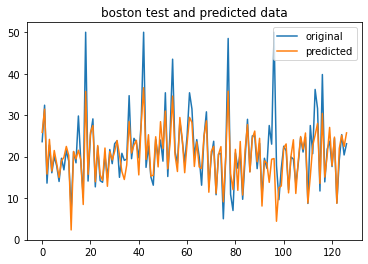

In [26]:
x_ax = range(len(y_test))

plt.plot(x_ax, y_test, label='original')
plt.plot(x_ax, pred, label='predicted')
plt.title('boston test and predicted data')
plt.legend()
plt.show()